In [1]:
year=2019
month=9

In [2]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math


In [3]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [4]:
conn=db.get_conn()
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000", con=conn)
conn.close()

In [5]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [6]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

In [7]:
def get_summary(data, career):
    
    salaries = data.monthly_salary.values
    headcounts = data.headcount.values
    head_count=np.sum(headcounts)
    salary_average=np.average(salaries, weights=headcounts)
    q = weighted.weighted_quantile(salaries,[0.025,0.5,0.975],headcounts)
    print(f"2019年{month}月全国招收{career}{head_count}人。2019年{month}月全国{career}平均工资{salary_average:.0f}元，工资中位数{q[1]:.0f}元，其中95%的人的工资介于{q[0]:.0f}元到{q[2]:.0f}元。\r\n")
    
get_summary(data, '程序员')

2019年9月全国招收程序员292998人。2019年9月全国程序员平均工资13421元，工资中位数12500元，其中95%的人的工资介于3750元到35000元。



In [8]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

data_format={"percentage":"{:.2%}","salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}"}



In [9]:
data_career=get_sub_stats_by_col(data,'career')
data_career.style.format(data_format)

,career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
2,系统架构师,22637,5387,20833,45833,9648,3.29%
1,算法工程师,19056,5250,17500,45000,23505,8.02%
0,一般程序员,12570,3750,11500,30000,259393,88.53%
3,爬虫工程师,12508,5250,12000,33375,419,0.14%
4,生物信息工程师,9879,7000,9000,14000,33,0.01%


# 程序员工资

In [10]:
data_city=get_sub_stats_by_col(data,'province')
#data_city.city=data_city.city.map(translate_dict)
data_city.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,17224,3750,15000,45000,26430,9.02%
上海,16542,5250,15000,37500,45927,15.67%
广东,14660,4500,12500,35000,76942,26.26%
浙江,13874,3750,12500,30000,18084,6.17%
四川,12177,3000,11500,29229,12411,4.24%
江苏,11959,3750,11500,25000,30407,10.38%
湖北,11463,3750,10500,25000,15369,5.25%
湖南,11003,4000,10499,25000,6830,2.33%
陕西,10854,3750,10000,22500,7431,2.54%
天津,10552,3916,9500,22500,2273,0.78%


In [11]:
def describe(data_city, career):
    
    for index, row in data_city.iterrows():
        print(f"2019年{month}月{row[0]}招收{career}{row[5]}人。2019年{month}月{row[0]}{career}平均工资{row[1]:.0f}元，工资中位数{row[3]:.0f}元，其中95%的人的工资介于{row[2]:.0f}元到{row[4]:.0f}元。\r\n")


In [12]:
describe(data_city,'程序员')

2019年9月北京招收程序员26430人。2019年9月北京程序员平均工资17224元，工资中位数15000元，其中95%的人的工资介于3750元到45000元。

2019年9月上海招收程序员45927人。2019年9月上海程序员平均工资16542元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2019年9月广东招收程序员76942人。2019年9月广东程序员平均工资14660元，工资中位数12500元，其中95%的人的工资介于4500元到35000元。

2019年9月浙江招收程序员18084人。2019年9月浙江程序员平均工资13874元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。

2019年9月四川招收程序员12411人。2019年9月四川程序员平均工资12177元，工资中位数11500元，其中95%的人的工资介于3000元到29229元。

2019年9月江苏招收程序员30407人。2019年9月江苏程序员平均工资11959元，工资中位数11500元，其中95%的人的工资介于3750元到25000元。

2019年9月湖北招收程序员15369人。2019年9月湖北程序员平均工资11463元，工资中位数10500元，其中95%的人的工资介于3750元到25000元。

2019年9月湖南招收程序员6830人。2019年9月湖南程序员平均工资11003元，工资中位数10499元，其中95%的人的工资介于4000元到25000元。

2019年9月陕西招收程序员7431人。2019年9月陕西程序员平均工资10854元，工资中位数10000元，其中95%的人的工资介于3750元到22500元。

2019年9月天津招收程序员2273人。2019年9月天津程序员平均工资10552元，工资中位数9500元，其中95%的人的工资介于3916元到22500元。

2019年9月重庆招收程序员4182人。2019年9月重庆程序员平均工资10420元，工资中位数9500元，其中95%的人的工资介于4000元到24542元。

2019年9月福建招收程序员5561人。2019年9月福建程序员平均工资10347元，工资中位数10000元，其中95%的人的工资介于3750元到20000元。

2019年9月海南招收

In [13]:
data_location = pd.read_csv('../../data/provincial_capital_locations.csv', encoding='utf-8')
data_location=data_location.set_index('province')

In [14]:
from mpl_toolkits.basemap import Basemap

In [15]:
def draw_map(data_city,headcount_scale, title):


    #cities = []
    scale = 5

    locations = [(116.407526, 39.90403),(120, 30)]
    #fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.rcParams['figure.figsize'] = [13, 13]
    #plt.figure(figsize = (10,5))
    fig, ax = plt.subplots()
    fig.title=title
    fig.figsize=(10,5)
    fig.dpi=80
    cn_map= Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, \
               projection='lcc', lat_1=33, lat_2=45, lon_0=100) # ‘lcc'将投影方式设置为兰伯特投影

    # load the shapefile, use the name 'states'
    cn_map.readshapefile(r'D:/data/basemap/gadm36_CHN_shp/gadm36_CHN_1', name='china', drawbounds=True, color='gray')
    cn_map.readshapefile(r'D:/data/basemap/gadm36_TWN_shp/gadm36_TWN_1', name='taiwan', drawbounds=True, color='gray')
    #geolocator = Nominatim(user_agent="my-application")



    salary_min=data_city.salary_mean.min()
    salary_max=data_city.salary_mean.max()
    salary_middle = (salary_min+salary_max)/2
    salary_scale=salary_max-salary_min

    for index, row in data_city.iterrows():
        province=row[0]
        
        longitude = data_location.loc[province,'longitude']
        latitude = data_location.loc[province,'latitude']
        salary=row[1]
        headcount=row[5]
        #color
        color_red=0
        color_green=0
        color_blue=0
        if salary>salary_middle:
            color_red = 255 #int((salary - salary_middle) / (salary_scale/2)*255)
            color_green = int((salary_max - salary) / (salary_scale/2)*255)
        else:
            color_blue = int((salary_middle - salary) / (salary_scale/2)*255)
            color_green = int((salary - salary_min) / (salary_scale/2)*255)
            color_red = int((salary - salary_min) / (salary_scale/2)*255)

        color = '#{:02x}{:02x}{:02x}'.format(color_red,color_green,color_blue)


        x, y = cn_map(longitude,latitude)
        cn_map.plot(x,y,marker='o',color=color,markersize=int(math.sqrt(headcount/headcount_scale))+8)
        #ax.annotate(city, (x,y), xytext=(5, 5), textcoords='offset points', fontsize=15)
        #"{}{:.0f}".format(city_cn, salary)
        #ax.text(x+5, y+5,city , fontweight='bold', fontsize=int(headcount/2500+12))
        fontsize=int(math.sqrt(headcount/headcount_scale))+13
        if province == '浙江':
            #x=x-400000
            y=y-100000

        elif province=='安徽':
            x=x-300000
            y=y+10000
        elif province=='江苏':
            x=x-150000
        elif province=='天津':
            y=y-50000
        elif province=='上海':
            x=x+50000
        elif province=='湖北':
            y=y-50000

        ax.text(x, y, "{}{:.0f}k".format(province, np.round(salary/1000)), fontweight='bold', fontsize=fontsize, bbox={'facecolor':color, 'alpha':0.3, 'pad':0})
    ax.text(2053805, 1077845, "https://github.com/juwikuang/china_job_survey".format(province, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(205805, 107845, "https://github.com/juwikuang/china_job_survey".format(province, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(805805, 4007845, title.format(province, np.round(salary/1000)), fontweight='bold',color='#111111', fontsize=25)    
    ax.text(805805, 3807845, "（城市大小代表招聘数量，颜色代表工资，红色最高，黄色次之，蓝最少）", fontweight='bold',color='#111111', fontsize=13)    
    #cn_map.drawcoastlines() #绘制海岸线
    #cn_map.drawcountries(linewidth=1.5) #绘制国家边界线
    plt.show()


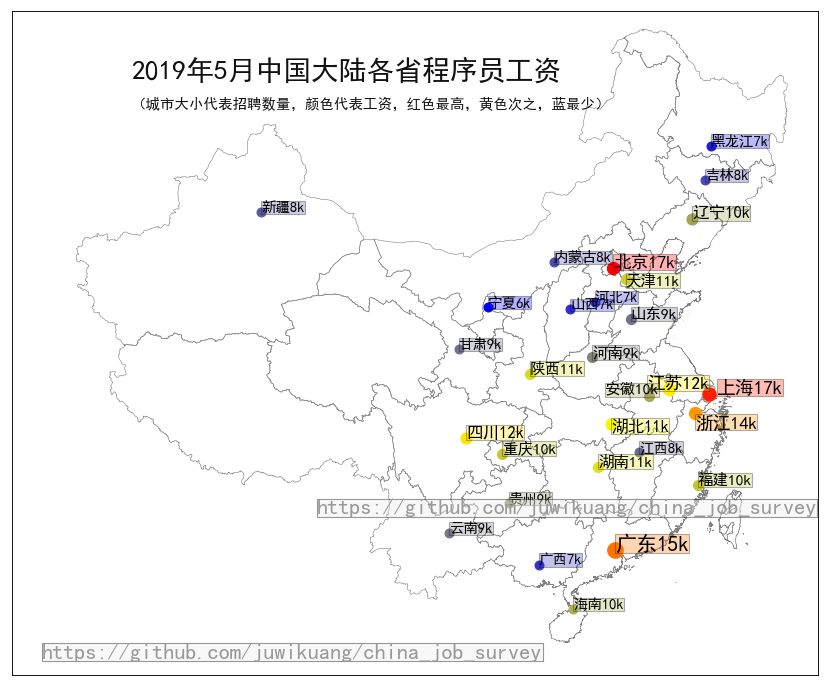

In [16]:
draw_map(data_city,2000,'2019年5月中国大陆各省程序员工资')

# 算法工程师

In [17]:
get_summary(data[data.career=='算法工程师'], '算法工程师')

2019年9月全国招收算法工程师23505人。2019年9月全国算法工程师平均工资19056元，工资中位数17500元，其中95%的人的工资介于5250元到45000元。



In [18]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'province')

data_city_algorithm.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,23400,5250,22500,50000,2887,12.28%
上海,22963,6500,22500,48667,4524,19.25%
海南,21042,12625,15500,35000,24,0.10%
广东,20068,5500,17916,45000,6264,26.65%
浙江,19415,3750,17500,45187,1615,6.87%
江苏,16375,4500,15000,32500,2774,11.80%
湖北,15261,4617,15000,27500,1174,4.99%
四川,15162,5191,14000,31250,1087,4.62%
湖南,14553,7000,12500,32000,468,1.99%
安徽,13808,5250,12500,35304,383,1.63%


In [19]:
describe(data_city_algorithm,'算法工程师')

2019年9月北京招收算法工程师2887人。2019年9月北京算法工程师平均工资23400元，工资中位数22500元，其中95%的人的工资介于5250元到50000元。

2019年9月上海招收算法工程师4524人。2019年9月上海算法工程师平均工资22963元，工资中位数22500元，其中95%的人的工资介于6500元到48667元。

2019年9月海南招收算法工程师24人。2019年9月海南算法工程师平均工资21042元，工资中位数15500元，其中95%的人的工资介于12625元到35000元。

2019年9月广东招收算法工程师6264人。2019年9月广东算法工程师平均工资20068元，工资中位数17916元，其中95%的人的工资介于5500元到45000元。

2019年9月浙江招收算法工程师1615人。2019年9月浙江算法工程师平均工资19415元，工资中位数17500元，其中95%的人的工资介于3750元到45187元。

2019年9月江苏招收算法工程师2774人。2019年9月江苏算法工程师平均工资16375元，工资中位数15000元，其中95%的人的工资介于4500元到32500元。

2019年9月湖北招收算法工程师1174人。2019年9月湖北算法工程师平均工资15261元，工资中位数15000元，其中95%的人的工资介于4617元到27500元。

2019年9月四川招收算法工程师1087人。2019年9月四川算法工程师平均工资15162元，工资中位数14000元，其中95%的人的工资介于5191元到31250元。

2019年9月湖南招收算法工程师468人。2019年9月湖南算法工程师平均工资14553元，工资中位数12500元，其中95%的人的工资介于7000元到32000元。

2019年9月安徽招收算法工程师383人。2019年9月安徽算法工程师平均工资13808元，工资中位数12500元，其中95%的人的工资介于5250元到35304元。

2019年9月陕西招收算法工程师557人。2019年9月陕西算法工程师平均工资13714元，工资中位数12500元，其中95%的人的工资介于4639元到30000元。

2019年9月天津招收算法工程师142人。2019年9月天津算法工程师平均工资13478元，工资中位数12429元，

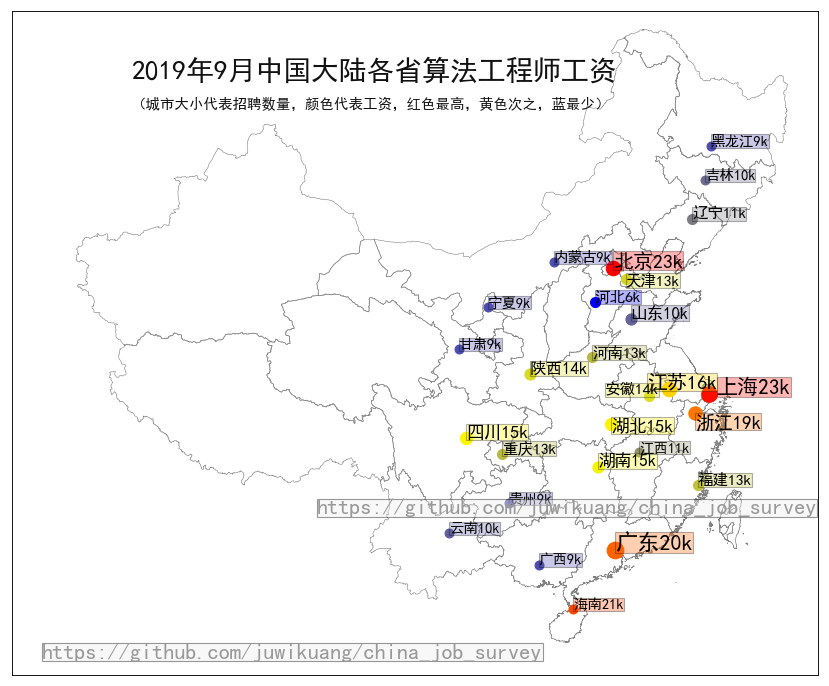

In [20]:
draw_map(data_city_algorithm,100,f'2019年{month}月中国大陆各省算法工程师工资')

# 系统架构师

In [21]:
get_summary(data[data.career=='系统架构师'], '系统架构师')

2019年9月全国招收系统架构师9648人。2019年9月全国系统架构师平均工资22637元，工资中位数20833元，其中95%的人的工资介于5387元到45833元。



In [22]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'province')

data_city_architect.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,31325,9367,30000,60000,1304,13.52%
上海,24710,7000,22500,50000,1952,20.23%
河北,24036,7000,13400,75000,14,0.15%
广东,23065,5250,22500,45833,2873,29.78%
浙江,22452,6353,22500,45000,633,6.56%
四川,18492,6447,17500,42854,323,3.35%
江苏,18271,5975,17500,39062,895,9.28%
湖北,17461,6080,17143,34033,416,4.31%
陕西,17459,6179,17500,38500,204,2.11%
辽宁,16931,4500,15000,37500,135,1.40%


In [23]:
describe(data_city_architect,'系统架构师')

2019年9月北京招收系统架构师1304人。2019年9月北京系统架构师平均工资31325元，工资中位数30000元，其中95%的人的工资介于9367元到60000元。

2019年9月上海招收系统架构师1952人。2019年9月上海系统架构师平均工资24710元，工资中位数22500元，其中95%的人的工资介于7000元到50000元。

2019年9月河北招收系统架构师14人。2019年9月河北系统架构师平均工资24036元，工资中位数13400元，其中95%的人的工资介于7000元到75000元。

2019年9月广东招收系统架构师2873人。2019年9月广东系统架构师平均工资23065元，工资中位数22500元，其中95%的人的工资介于5250元到45833元。

2019年9月浙江招收系统架构师633人。2019年9月浙江系统架构师平均工资22452元，工资中位数22500元，其中95%的人的工资介于6353元到45000元。

2019年9月四川招收系统架构师323人。2019年9月四川系统架构师平均工资18492元，工资中位数17500元，其中95%的人的工资介于6447元到42854元。

2019年9月江苏招收系统架构师895人。2019年9月江苏系统架构师平均工资18271元，工资中位数17500元，其中95%的人的工资介于5975元到39062元。

2019年9月湖北招收系统架构师416人。2019年9月湖北系统架构师平均工资17461元，工资中位数17143元，其中95%的人的工资介于6080元到34033元。

2019年9月陕西招收系统架构师204人。2019年9月陕西系统架构师平均工资17459元，工资中位数17500元，其中95%的人的工资介于6179元到38500元。

2019年9月辽宁招收系统架构师135人。2019年9月辽宁系统架构师平均工资16931元，工资中位数15000元，其中95%的人的工资介于4500元到37500元。

2019年9月湖南招收系统架构师192人。2019年9月湖南系统架构师平均工资16615元，工资中位数15000元，其中95%的人的工资介于8371元到27900元。

2019年9月河南招收系统架构师87人。2019年9月河南系统架构师平均工资15997元，工资中位数15000元，其中95%的

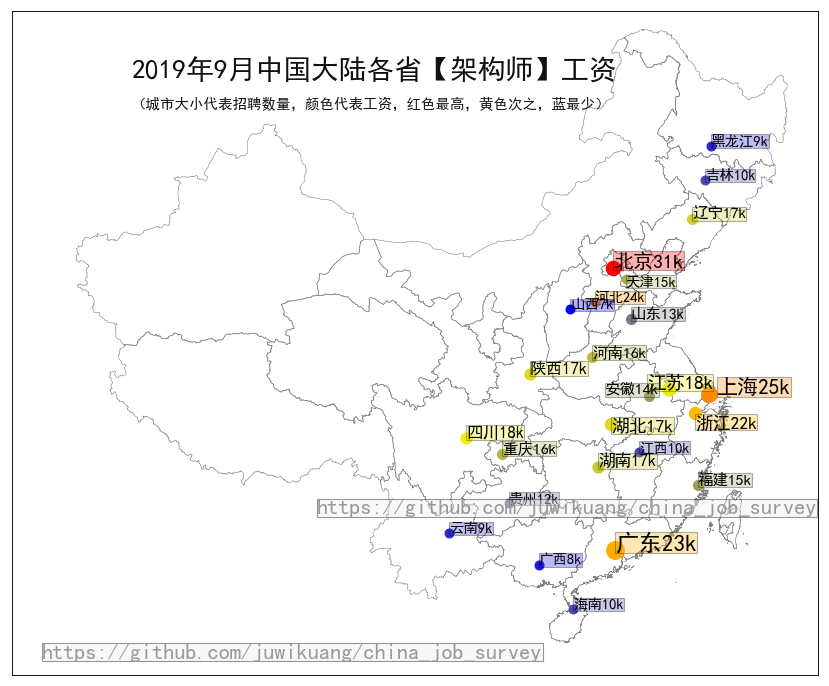

In [24]:
draw_map(data_city_architect,40,f'2019年{month}月中国大陆各省【架构师】工资')

# 生物信息工程师

In [25]:
get_summary(data[data.career=='生物信息工程师'], '生物信息工程师')

2019年9月全国招收生物信息工程师33人。2019年9月全国生物信息工程师平均工资9879元，工资中位数9000元，其中95%的人的工资介于7000元到14000元。



In [26]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'province')
#data_bio.city=data_bio.city.map(translate_dict)
data_bio.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,12500,12500,12500,12500,2,6.06%
浙江,12000,11500,12000,12500,2,6.06%
吉林,11500,11500,11500,11500,2,6.06%
广东,9885,7000,8800,14000,13,39.39%
江苏,9875,9000,9875,12500,4,12.12%
上海,9800,8000,9800,12500,5,15.15%
湖北,9000,9000,9000,9000,1,3.03%
江西,7000,7000,7000,7000,1,3.03%
广西,7000,7000,7000,7000,3,9.09%


In [27]:
describe(data_bio,'生物信息工程师')

2019年9月北京招收生物信息工程师2人。2019年9月北京生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2019年9月浙江招收生物信息工程师2人。2019年9月浙江生物信息工程师平均工资12000元，工资中位数12000元，其中95%的人的工资介于11500元到12500元。

2019年9月吉林招收生物信息工程师2人。2019年9月吉林生物信息工程师平均工资11500元，工资中位数11500元，其中95%的人的工资介于11500元到11500元。

2019年9月广东招收生物信息工程师13人。2019年9月广东生物信息工程师平均工资9885元，工资中位数8800元，其中95%的人的工资介于7000元到14000元。

2019年9月江苏招收生物信息工程师4人。2019年9月江苏生物信息工程师平均工资9875元，工资中位数9875元，其中95%的人的工资介于9000元到12500元。

2019年9月上海招收生物信息工程师5人。2019年9月上海生物信息工程师平均工资9800元，工资中位数9800元，其中95%的人的工资介于8000元到12500元。

2019年9月湖北招收生物信息工程师1人。2019年9月湖北生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2019年9月江西招收生物信息工程师1人。2019年9月江西生物信息工程师平均工资7000元，工资中位数7000元，其中95%的人的工资介于7000元到7000元。

2019年9月广西招收生物信息工程师3人。2019年9月广西生物信息工程师平均工资7000元，工资中位数7000元，其中95%的人的工资介于7000元到7000元。



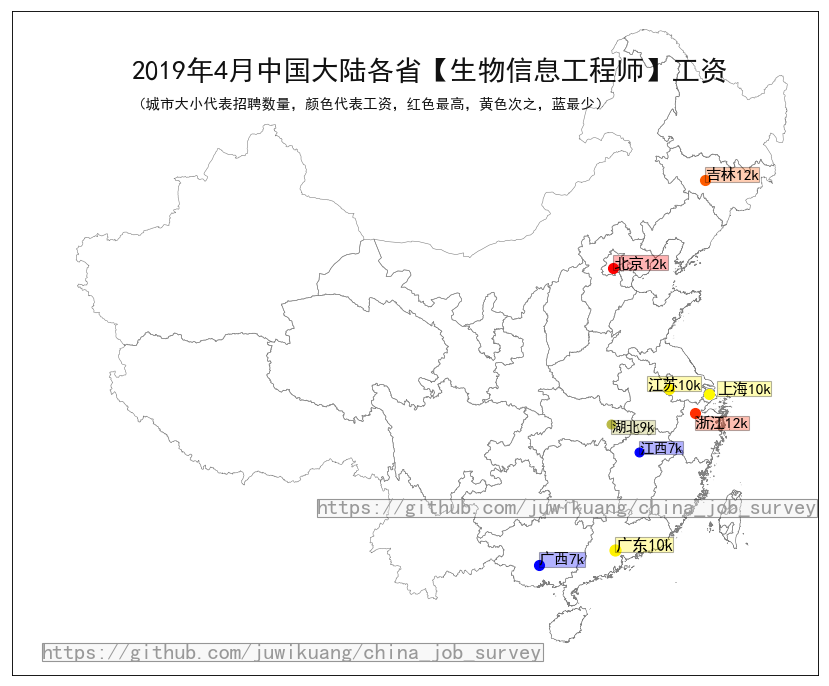

In [28]:
draw_map(data_bio,2,'2019年4月中国大陆各省【生物信息工程师】工资')

# 爬虫工程师

In [29]:
get_summary(data[data.career=='爬虫工程师'], '爬虫工程师')

2019年9月全国招收爬虫工程师419人。2019年9月全国爬虫工程师平均工资12508元，工资中位数12000元，其中95%的人的工资介于5250元到33375元。



In [30]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'province')


data_spider=data_spider[data_spider.head_count>10]
data_spider.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,17750,1750,15000,35000,30,7.16%
上海,13995,5812,12500,29375,100,23.87%
江苏,13729,8000,12500,20000,35,8.35%
浙江,13024,9025,12500,22475,21,5.01%
广东,12168,4535,11429,33958,134,31.98%
湖北,10544,7000,10687,12500,19,4.53%
湖南,9619,7000,9600,11500,21,5.01%
四川,9417,6000,10000,14000,18,4.30%
河北,6250,6250,6250,6250,16,3.82%


In [31]:
describe(data_spider, '爬虫工程师')

2019年9月北京招收爬虫工程师30人。2019年9月北京爬虫工程师平均工资17750元，工资中位数15000元，其中95%的人的工资介于1750元到35000元。

2019年9月上海招收爬虫工程师100人。2019年9月上海爬虫工程师平均工资13995元，工资中位数12500元，其中95%的人的工资介于5812元到29375元。

2019年9月江苏招收爬虫工程师35人。2019年9月江苏爬虫工程师平均工资13729元，工资中位数12500元，其中95%的人的工资介于8000元到20000元。

2019年9月浙江招收爬虫工程师21人。2019年9月浙江爬虫工程师平均工资13024元，工资中位数12500元，其中95%的人的工资介于9025元到22475元。

2019年9月广东招收爬虫工程师134人。2019年9月广东爬虫工程师平均工资12168元，工资中位数11429元，其中95%的人的工资介于4535元到33958元。

2019年9月湖北招收爬虫工程师19人。2019年9月湖北爬虫工程师平均工资10544元，工资中位数10687元，其中95%的人的工资介于7000元到12500元。

2019年9月湖南招收爬虫工程师21人。2019年9月湖南爬虫工程师平均工资9619元，工资中位数9600元，其中95%的人的工资介于7000元到11500元。

2019年9月四川招收爬虫工程师18人。2019年9月四川爬虫工程师平均工资9417元，工资中位数10000元，其中95%的人的工资介于6000元到14000元。

2019年9月河北招收爬虫工程师16人。2019年9月河北爬虫工程师平均工资6250元，工资中位数6250元，其中95%的人的工资介于6250元到6250元。



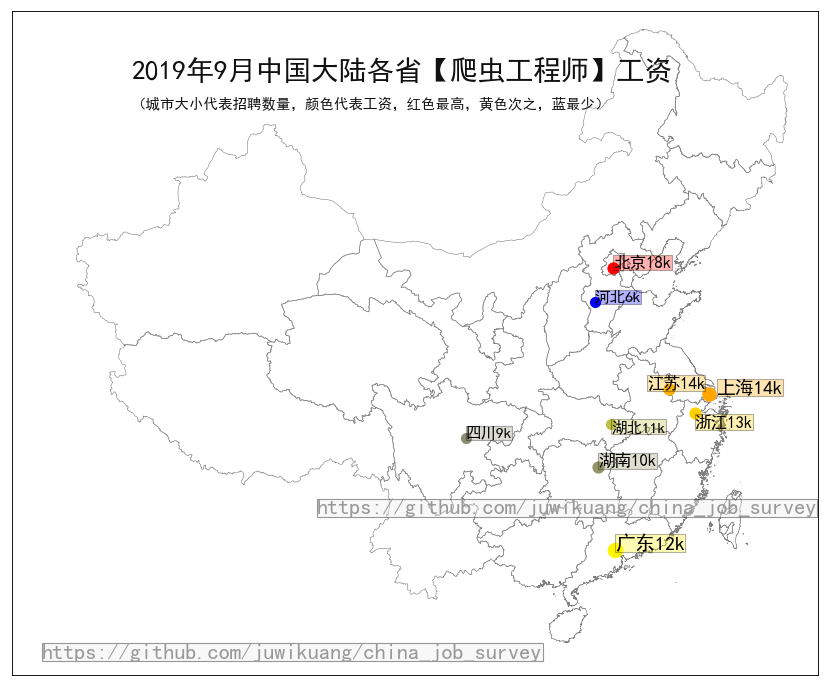

In [32]:
draw_map(data_spider,5,f'2019年{month}月中国大陆各省【爬虫工程师】工资')

# Java程序员

In [33]:
get_summary(data[data.pl_java==1], 'Java程序员')

2019年9月全国招收Java程序员135643人。2019年9月全国Java程序员平均工资13393元，工资中位数12500元，其中95%的人的工资介于3750元到31500元。



In [34]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'province')
data_java.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
上海,16881,5500,15000,35000,20107,14.82%
北京,16136,3750,14000,37500,12755,9.40%
广东,14980,4853,12500,35000,34771,25.63%
浙江,14173,3750,12500,30000,8704,6.42%
江苏,11942,3754,11500,24000,13982,10.31%
四川,11845,2500,11500,25000,5200,3.83%
湖北,11239,4000,10500,25000,6191,4.56%
天津,10726,3750,10000,22500,1125,0.83%
陕西,10698,3113,10000,22500,3385,2.50%
湖南,10655,3750,10430,22500,3286,2.42%


In [35]:
describe(data_java, 'Java程序员')

2019年9月上海招收Java程序员20107人。2019年9月上海Java程序员平均工资16881元，工资中位数15000元，其中95%的人的工资介于5500元到35000元。

2019年9月北京招收Java程序员12755人。2019年9月北京Java程序员平均工资16136元，工资中位数14000元，其中95%的人的工资介于3750元到37500元。

2019年9月广东招收Java程序员34771人。2019年9月广东Java程序员平均工资14980元，工资中位数12500元，其中95%的人的工资介于4853元到35000元。

2019年9月浙江招收Java程序员8704人。2019年9月浙江Java程序员平均工资14173元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。

2019年9月江苏招收Java程序员13982人。2019年9月江苏Java程序员平均工资11942元，工资中位数11500元，其中95%的人的工资介于3754元到24000元。

2019年9月四川招收Java程序员5200人。2019年9月四川Java程序员平均工资11845元，工资中位数11500元，其中95%的人的工资介于2500元到25000元。

2019年9月湖北招收Java程序员6191人。2019年9月湖北Java程序员平均工资11239元，工资中位数10500元，其中95%的人的工资介于4000元到25000元。

2019年9月天津招收Java程序员1125人。2019年9月天津Java程序员平均工资10726元，工资中位数10000元，其中95%的人的工资介于3750元到22500元。

2019年9月陕西招收Java程序员3385人。2019年9月陕西Java程序员平均工资10698元，工资中位数10000元，其中95%的人的工资介于3113元到22500元。

2019年9月湖南招收Java程序员3286人。2019年9月湖南Java程序员平均工资10655元，工资中位数10430元，其中95%的人的工资介于3750元到22500元。

2019年9月重庆招收Java程序员2007人。2019年9月重庆Java程序员平均工资10326元，工资中位数10000元，其中95%的人的工资介于4500元到22500元。

2019年9

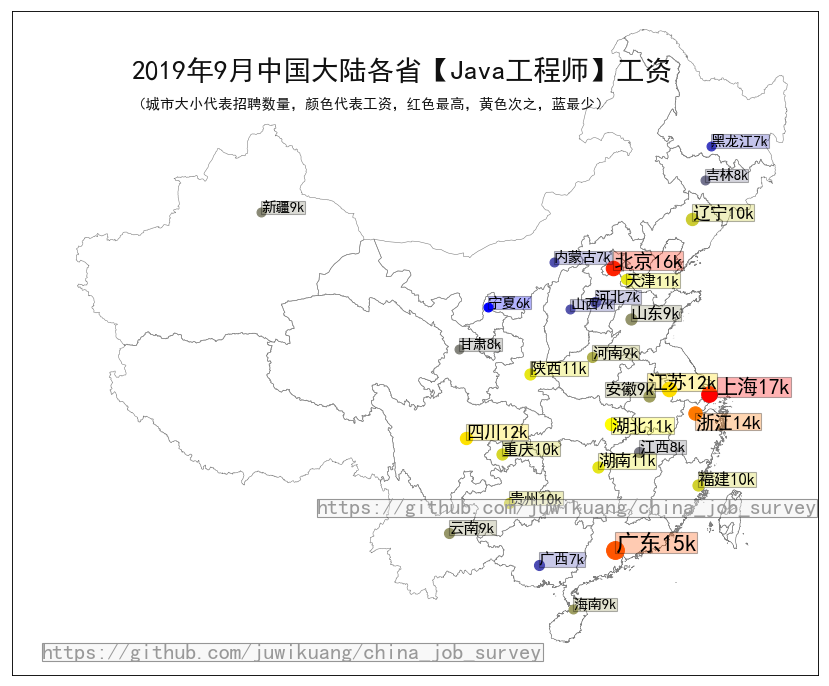

In [36]:
draw_map(data_java, 500, f'2019年{month}月中国大陆各省【Java工程师】工资')

# Python程序员

In [37]:
get_summary(data[data.pl_python==1], 'Python程序员')

2019年9月全国招收Python程序员30692人。2019年9月全国Python程序员平均工资17801元，工资中位数15000元，其中95%的人的工资介于4000元到41666元。



In [38]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'province')
data_python.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,21782,3750,20000,45000,4247,13.84%
上海,20776,6500,18750,45833,6455,21.03%
广东,19095,5000,17500,40000,7595,24.75%
海南,17537,7500,15000,35000,41,0.13%
浙江,16407,4000,14583,45000,2043,6.66%
四川,15772,3750,14000,35000,1430,4.66%
江苏,15210,4500,14000,31525,2936,9.57%
湖北,14261,3689,13000,30000,1447,4.71%
天津,14187,5312,12500,28500,184,0.60%
湖南,13460,5100,12500,34167,640,2.09%


In [39]:
describe(data_python, 'Python程序员')

2019年9月北京招收Python程序员4247人。2019年9月北京Python程序员平均工资21782元，工资中位数20000元，其中95%的人的工资介于3750元到45000元。

2019年9月上海招收Python程序员6455人。2019年9月上海Python程序员平均工资20776元，工资中位数18750元，其中95%的人的工资介于6500元到45833元。

2019年9月广东招收Python程序员7595人。2019年9月广东Python程序员平均工资19095元，工资中位数17500元，其中95%的人的工资介于5000元到40000元。

2019年9月海南招收Python程序员41人。2019年9月海南Python程序员平均工资17537元，工资中位数15000元，其中95%的人的工资介于7500元到35000元。

2019年9月浙江招收Python程序员2043人。2019年9月浙江Python程序员平均工资16407元，工资中位数14583元，其中95%的人的工资介于4000元到45000元。

2019年9月四川招收Python程序员1430人。2019年9月四川Python程序员平均工资15772元，工资中位数14000元，其中95%的人的工资介于3750元到35000元。

2019年9月江苏招收Python程序员2936人。2019年9月江苏Python程序员平均工资15210元，工资中位数14000元，其中95%的人的工资介于4500元到31525元。

2019年9月湖北招收Python程序员1447人。2019年9月湖北Python程序员平均工资14261元，工资中位数13000元，其中95%的人的工资介于3689元到30000元。

2019年9月天津招收Python程序员184人。2019年9月天津Python程序员平均工资14187元，工资中位数12500元，其中95%的人的工资介于5312元到28500元。

2019年9月湖南招收Python程序员640人。2019年9月湖南Python程序员平均工资13460元，工资中位数12500元，其中95%的人的工资介于5100元到34167元。

2019年9月重庆招收Python程序员388人。2019年9月重庆Python程序员平均工资13149元，工资中位数12500

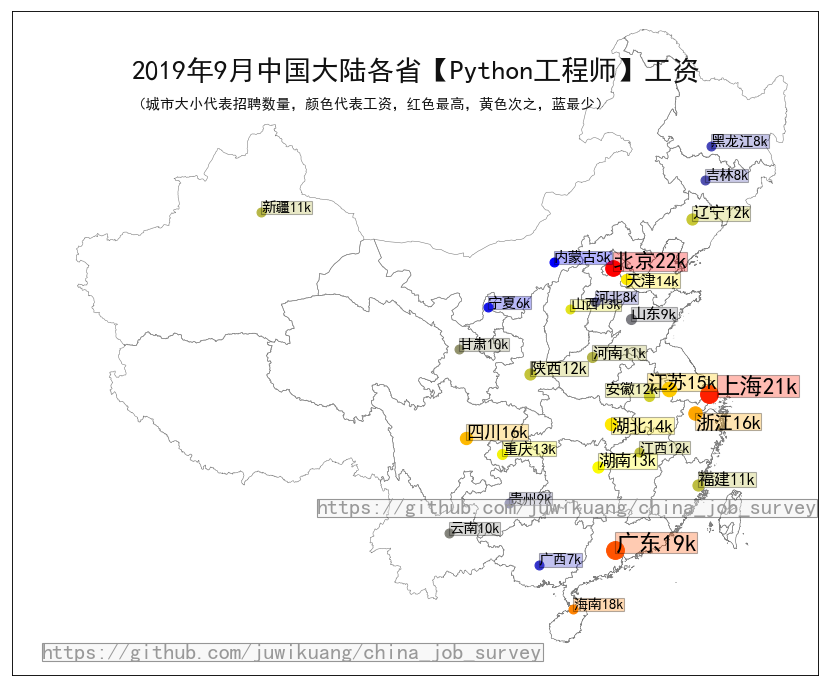

In [40]:
draw_map(data_python, 100,  f'2019年{month}月中国大陆各省【Python工程师】工资')